PROJECT EXPERIMENT:Building an efficient machine learning model that will help make predictions on apps users that will adopt or not

we start by importing the user engagement dataset to enable us understand the engagement of 12,000 users who signed up for the product in the last two years.

In [4]:
#import packages
import pandas as pd
from datetime import datetime

In [5]:
df=pd.read_csv('takehome_user_engagement.csv')
df4=df.copy()
df8=df.copy()
df.head(10)
df['time_stamp']=pd.to_datetime(df['time_stamp'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 207917 entries, 0 to 207916
Data columns (total 3 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   time_stamp  207917 non-null  datetime64[ns]
 1   user_id     207917 non-null  int64         
 2   visited     207917 non-null  int64         
dtypes: datetime64[ns](1), int64(2)
memory usage: 4.8 MB


In [6]:
df['user_id'].nunique()

8823

we have 8823 users of the app in the past two years

In [7]:
df1=df.rename(columns={'time_stamp':'time_s'})
#df1.time_s=pd.to_datetime(df1['time_s'], format ='%d%b%Y:%H:%M:%S.%f')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 207917 entries, 0 to 207916
Data columns (total 3 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   time_stamp  207917 non-null  datetime64[ns]
 1   user_id     207917 non-null  int64         
 2   visited     207917 non-null  int64         
dtypes: datetime64[ns](1), int64(2)
memory usage: 4.8 MB


In [8]:
import numpy as np
dff=df.user_id.value_counts()
dff2=dff.reset_index()
dff2.columns=['user_id','counts']
x1=dff2.counts[dff2.counts<3].count()
x2=dff2.counts[dff2.counts>=3].count()
x2


2248

from the count it shows out of the 8823 users, 6575 visited the app < 3 times. thus 2248 users visited 3 times and above

<Axes: title={'center': 'top users of the app for two years'}>

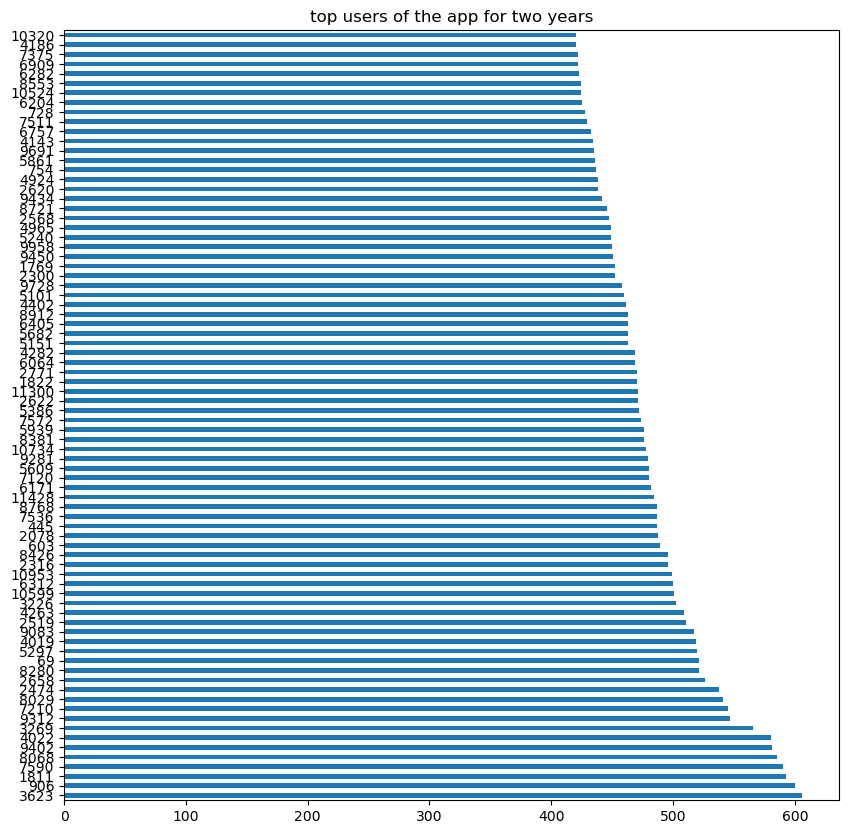

In [9]:
df.user_id.value_counts().sort_values(ascending=False).head(80).plot(kind='barh',figsize=(10, 10), title='top users of the app for two years')

[array([74.52113793, 25.47886207]), array([74.52113793, 25.47886207])]

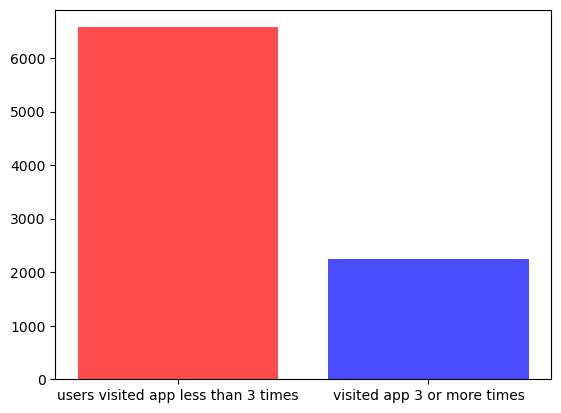

In [10]:
import matplotlib.pyplot as plt
x=['users visited app less than 3 times','visited app 3 or more times']
y=[x1,x2]
total= x1+x2
percentages = [(y / total) * 100 for count in y]
plt.bar(x,y,color=['Red','Blue'], linestyle='--', alpha=0.7)
percentages

we will focus on the users who visited 3 or more times to know those who did for 3 different days in a week

In [11]:
user_visited_counts = df['user_id'].value_counts()
df['user_visited_counts'] = df['user_id'].map(user_visited_counts)
df=df[df['user_visited_counts']>=3].sort_values(by='user_visited_counts' ,ascending=False)

df.head(30)


,time_stamp,user_id,visited,user_visited_counts
62718,2012-07-01 14:34:33,3623,1,606
62926,2013-04-06 14:34:33,3623,1,606
62924,2013-04-04 14:34:33,3623,1,606
62923,2013-04-02 14:34:33,3623,1,606
62922,2013-03-31 14:34:33,3623,1,606
62921,2013-03-30 14:34:33,3623,1,606
62920,2013-03-29 14:34:33,3623,1,606
62919,2013-03-28 14:34:33,3623,1,606
62918,2013-03-27 14:34:33,3623,1,606
62917,2013-03-26 14:34:33,3623,1,606


In [12]:
# Sort and group by 'user_id'
dfg=df.loc[:, 'time_stamp':'user_id']
dfg.sort_values(by=['user_id', 'time_stamp'], inplace=True)
group_users = dfg.groupby('user_id')

In [13]:
# lets get a list of adopted users
adopted_users = []
for user, group in group_users:
    rolling_window = group['time_stamp'].rolling(window=7)
    login_counts = rolling_window.count()
    if any(login_counts >= 3):
        adopted_users.append(user)
print("Adopted Users:", adopted_users)


C:\Users\Consultant\AppData\Local\Temp\ipykernel_19744\2537949498.py:5: FutureWarning: min_periods=None will default to the size of window consistent with other methods in a future version. Specify min_periods=0 instead.
  login_counts = rolling_window.count()


Adopted Users: [2, 10, 20, 33, 42, 43, 50, 53, 59, 60, 63, 69, 74, 77, 80, 81, 82, 87, 95, 126, 133, 135, 136, 141, 142, 146, 153, 160, 165, 168, 171, 172, 174, 185, 188, 197, 200, 202, 203, 209, 214, 221, 230, 241, 245, 247, 251, 263, 265, 275, 277, 280, 283, 297, 298, 305, 310, 311, 321, 322, 330, 337, 341, 345, 347, 351, 362, 363, 367, 370, 375, 382, 383, 390, 397, 398, 401, 417, 418, 430, 445, 450, 455, 460, 462, 469, 471, 472, 478, 479, 481, 483, 492, 494, 497, 502, 506, 509, 510, 511, 512, 518, 520, 522, 528, 529, 535, 540, 543, 547, 553, 555, 561, 564, 572, 575, 589, 591, 601, 603, 605, 607, 608, 617, 618, 627, 628, 632, 634, 639, 649, 665, 669, 679, 680, 710, 715, 716, 717, 724, 725, 728, 736, 738, 746, 754, 772, 783, 786, 788, 793, 804, 814, 815, 817, 828, 845, 850, 851, 869, 874, 882, 885, 887, 901, 906, 907, 912, 928, 932, 934, 937, 943, 946, 953, 980, 985, 991, 994, 999, 1007, 1009, 1013, 1017, 1018, 1026, 1027, 1030, 1035, 1039, 1049, 1055, 1061, 1064, 1072, 1087, 1088, 10

out of the 8823 users, 2248 are adopted users

In [14]:
len(adopted_users)

2248

In [15]:
adoptedu=pd.DataFrame(adopted_users)
adoptedu.columns=['adopted_usersid']
adoptedu

,adopted_usersid
0,2
1,10
2,20
3,33
4,42
...,...
2243,11975
2244,11980
2245,11981
2246,11988


In [16]:
dfhome=pd.read_csv('takehome_users.csv',encoding='latin1')
dfhome.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12000 entries, 0 to 11999
Data columns (total 10 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   object_id                   12000 non-null  int64  
 1   creation_time               12000 non-null  object 
 2   name                        12000 non-null  object 
 3   email                       12000 non-null  object 
 4   creation_source             12000 non-null  object 
 5   last_session_creation_time  8823 non-null   float64
 6   opted_in_to_mailing_list    12000 non-null  int64  
 7   enabled_for_marketing_drip  12000 non-null  int64  
 8   org_id                      12000 non-null  int64  
 9   invited_by_user_id          6417 non-null   float64
dtypes: float64(2), int64(4), object(4)
memory usage: 937.6+ KB


we will perform an inner join on the adapted users dataframe to be able to show know the adopted users and look at the characteristics if there are trends that can be proposed to new users

In [17]:
new_df=dfhome.merge(adoptedu,how='inner',left_on='object_id',right_on='adopted_usersid')
new_df

,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,adopted_usersid
0,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0,2
1,10,2013-01-16 22:08:03,Santos Carla,CarlaFerreiraSantos@gustr.com,ORG_INVITE,1.401833e+09,1,1,318,4143.0,10
2,20,2014-03-06 11:46:38,Helms Mikayla,lqyvjilf@uhzdq.com,SIGNUP,1.401364e+09,0,0,58,NaN,20
3,33,2014-03-11 06:29:09,Araujo José,JoseMartinsAraujo@cuvox.de,GUEST_INVITE,1.401518e+09,0,0,401,79.0,33
4,42,2012-11-11 19:05:07,Pinto Giovanna,GiovannaCunhaPinto@cuvox.de,SIGNUP,1.401045e+09,1,0,235,NaN,42
...,...,...,...,...,...,...,...,...,...,...,...
2243,11975,2013-03-23 11:10:11,Daecher Jürgen,JurgenDaecher@gustr.com,GUEST_INVITE,1.400757e+09,1,0,31,6410.0,11975
2244,11980,2014-02-02 15:23:18,Gloeckner Franziska,ljnnbqdr@cgbld.com,ORG_INVITE,1.397835e+09,0,0,406,3068.0,11980
2245,11981,2013-03-05 01:53:48,Fry Tyler,TylerFry@gmail.com,GUEST_INVITE,1.364868e+09,0,0,110,5775.0,11981
2246,11988,2014-03-15 11:04:47,Minick John,JohnFMinick@yahoo.com,PERSONAL_PROJECTS,1.401621e+09,0,0,114,NaN,11988


performing EDA to see features that may influence the adopted_users

In [18]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2248 entries, 0 to 2247
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   object_id                   2248 non-null   int64  
 1   creation_time               2248 non-null   object 
 2   name                        2248 non-null   object 
 3   email                       2248 non-null   object 
 4   creation_source             2248 non-null   object 
 5   last_session_creation_time  2248 non-null   float64
 6   opted_in_to_mailing_list    2248 non-null   int64  
 7   enabled_for_marketing_drip  2248 non-null   int64  
 8   org_id                      2248 non-null   int64  
 9   invited_by_user_id          1285 non-null   float64
 10  adopted_usersid             2248 non-null   int64  
dtypes: float64(2), int64(5), object(4)
memory usage: 210.8+ KB


In [19]:
new_df['creation_time']=pd.to_datetime(new_df['creation_time'])
new_df['last_session_creation_time'] = pd.to_datetime(new_df['last_session_creation_time'], unit='s')
new_df

,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,adopted_usersid
0,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,2014-03-31 03:45:04,0,0,1,316.0,2
1,10,2013-01-16 22:08:03,Santos Carla,CarlaFerreiraSantos@gustr.com,ORG_INVITE,2014-06-03 22:08:03,1,1,318,4143.0,10
2,20,2014-03-06 11:46:38,Helms Mikayla,lqyvjilf@uhzdq.com,SIGNUP,2014-05-29 11:46:38,0,0,58,NaN,20
3,33,2014-03-11 06:29:09,Araujo José,JoseMartinsAraujo@cuvox.de,GUEST_INVITE,2014-05-31 06:29:09,0,0,401,79.0,33
4,42,2012-11-11 19:05:07,Pinto Giovanna,GiovannaCunhaPinto@cuvox.de,SIGNUP,2014-05-25 19:05:07,1,0,235,NaN,42
...,...,...,...,...,...,...,...,...,...,...,...
2243,11975,2013-03-23 11:10:11,Daecher Jürgen,JurgenDaecher@gustr.com,GUEST_INVITE,2014-05-22 11:10:11,1,0,31,6410.0,11975
2244,11980,2014-02-02 15:23:18,Gloeckner Franziska,ljnnbqdr@cgbld.com,ORG_INVITE,2014-04-18 15:23:18,0,0,406,3068.0,11980
2245,11981,2013-03-05 01:53:48,Fry Tyler,TylerFry@gmail.com,GUEST_INVITE,2013-04-02 01:53:48,0,0,110,5775.0,11981
2246,11988,2014-03-15 11:04:47,Minick John,JohnFMinick@yahoo.com,PERSONAL_PROJECTS,2014-06-01 11:04:47,0,0,114,NaN,11988


<Axes: >

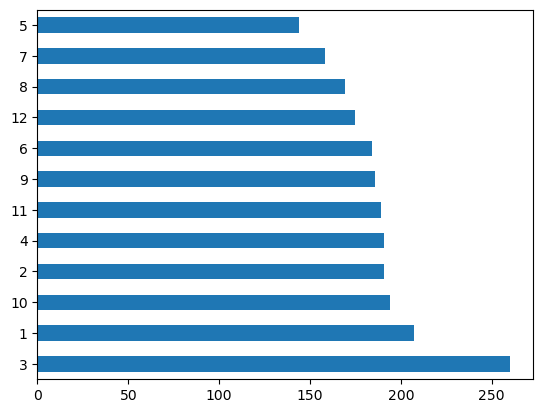

In [20]:
new_df['year'] = new_df['creation_time'].dt.year
#new_df['year'].value_counts().plot(kind='barh')
#new_df['creation_time'].sort_values()
new_df['month'] = new_df['creation_time'].dt.month
new_df['month'].value_counts().plot(kind='barh')

<BarContainer object of 7 artists>

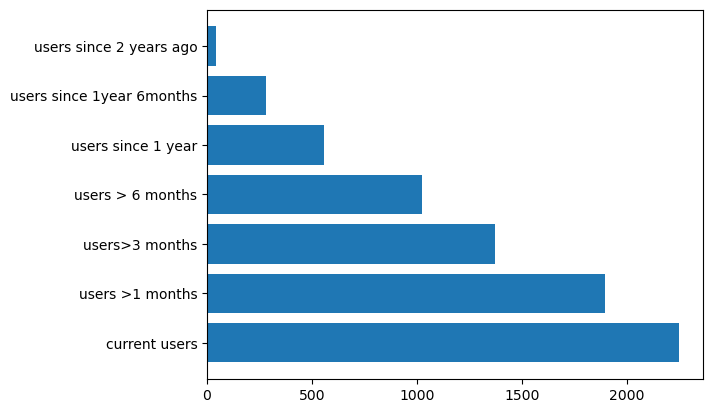

In [21]:
import matplotlib.pyplot as plt
new_df['period_usage']=new_df['last_session_creation_time']-new_df['creation_time']
x10=len(new_df[new_df['period_usage']>='1 days'])
x11=len(new_df[new_df['period_usage']>='30 days'])
x12=len(new_df[new_df['period_usage']>='90 days'])
x13=len(new_df[new_df['period_usage']>='180 days'])
x14=len(new_df[new_df['period_usage']>='365 days'])
x15=len(new_df[new_df['period_usage']>='547 days'])
x16=len(new_df[new_df['period_usage']>='700 days'])
y=[x10,x11,x12,x13,x14,x15,x16]
xf=['current users','users >1 months','users>3 months','users > 6 months','users since 1 year','users since 1year 6months','users since 2 years ago']
plt.barh(xf,y)

<BarContainer object of 2 artists>

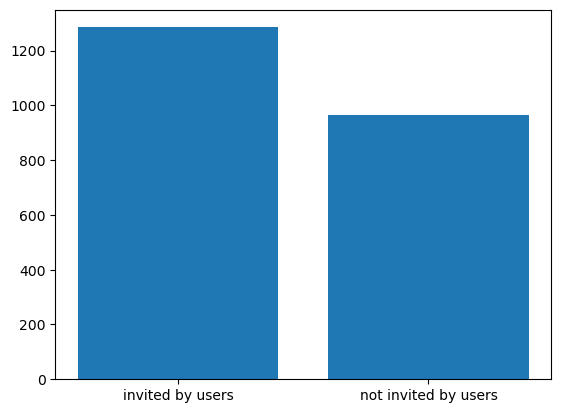

In [22]:
x21=new_df.invited_by_user_id.isna().sum()
x22=new_df.invited_by_user_id.notnull().sum()
y=[x22,x21]
x2=['invited by users','not invited by users']
plt.bar(x2,y)

In [23]:
new_df3=new_df.groupby('org_id')['name'].size().sort_values(ascending=True)
new_df5=new_df.groupby('invited_by_user_id')['name'].size().sort_values(ascending=False)
new_df5=new_df5[new_df5>=3].count()
new_df5

54

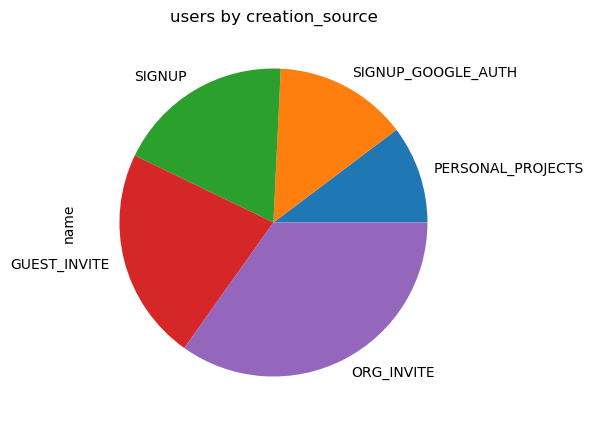

In [24]:
new_df1=new_df.groupby('creation_source')['name'].size().sort_values(ascending=True).plot(kind='pie',figsize=(10, 5), title='users by creation_source')

In [25]:
new_df.describe()
print('opted into mailing',new_df['opted_in_to_mailing_list'].value_counts())
new_df['enabled_for_marketing_drip'].value_counts()

opted into mailing 0    1670
1     578
Name: opted_in_to_mailing_list, dtype: int64


0    1900
1     348
Name: enabled_for_marketing_drip, dtype: int64

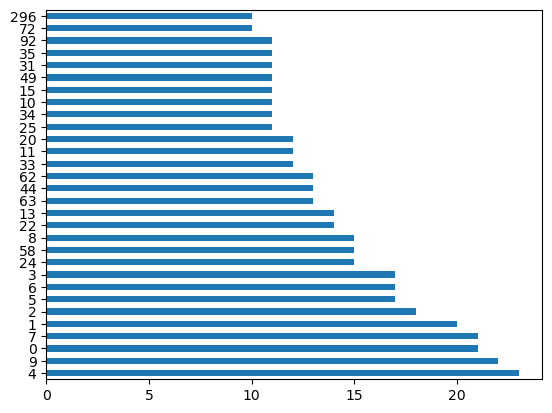

In [26]:
c1=new_df['org_id'].value_counts().sort_values(ascending=False).head(30).plot(kind='barh')

In [27]:
#adoptedu

In [28]:
non_adoptedu=dfhome.merge(adoptedu,how='outer',left_on='object_id',right_on='adopted_usersid')

In [29]:
non_adopt= non_adoptedu[non_adoptedu['adopted_usersid'].isnull()]
non_adopt['last_session_creation_time'] = pd.to_datetime(non_adopt['last_session_creation_time'], unit='s')
non_adopt['creation_time']=pd.to_datetime(non_adopt['creation_time'])
non_adopt

C:\Users\Consultant\anaconda3\Lib\site-packages\pandas\core\tools\datetimes.py:557: RuntimeWarning: invalid value encountered in cast
  arr, tz_parsed = tslib.array_with_unit_to_datetime(arg, unit, errors=errors)
C:\Users\Consultant\AppData\Local\Temp\ipykernel_19744\1671724181.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  non_adopt['last_session_creation_time'] = pd.to_datetime(non_adopt['last_session_creation_time'], unit='s')
C:\Users\Consultant\AppData\Local\Temp\ipykernel_19744\1671724181.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/in

,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,adopted_usersid
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,2014-04-22 03:53:30,1,0,11,10803.0,NaN
2,3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,2013-03-19 23:14:52,0,0,94,1525.0,NaN
3,4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,2013-05-22 08:09:28,0,0,1,5151.0,NaN
4,5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,2013-01-22 10:14:20,0,0,193,5240.0,NaN
5,6,2013-12-17 03:37:06,Cunha Eduardo,EduardoPereiraCunha@yahoo.com,GUEST_INVITE,2013-12-19 03:37:06,0,0,197,11241.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...
11995,11996,2013-09-06 06:14:15,Meier Sophia,SophiaMeier@gustr.com,ORG_INVITE,2013-09-06 06:14:15,0,0,89,8263.0,NaN
11996,11997,2013-01-10 18:28:37,Fisher Amelie,AmelieFisher@gmail.com,SIGNUP_GOOGLE_AUTH,2013-01-15 18:28:37,0,0,200,NaN,NaN
11997,11998,2014-04-27 12:45:16,Haynes Jake,JakeHaynes@cuvox.de,GUEST_INVITE,2014-04-27 12:45:16,1,1,83,8074.0,NaN
11998,11999,2012-05-31 11:55:59,Faber Annett,mhaerzxp@iuxiw.com,PERSONAL_PROJECTS,2012-06-02 11:55:59,0,0,6,NaN,NaN


<BarContainer object of 2 artists>

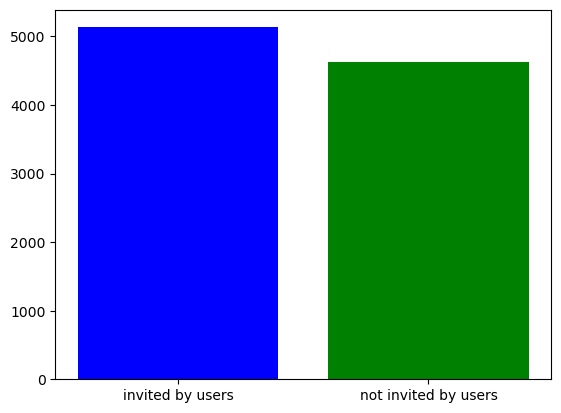

In [30]:
x31=non_adopt.invited_by_user_id.isna().sum()
x32=non_adopt.invited_by_user_id.notnull().sum()
yq=[x32,x31]
xq=['invited by users','not invited by users']
plt.bar(xq,yq,color=['blue','Green'])

In [31]:
print('opted into mailing',non_adopt['opted_in_to_mailing_list'].value_counts())
non_adopt['enabled_for_marketing_drip'].value_counts()

opted into mailing 0    7336
1    2416
Name: opted_in_to_mailing_list, dtype: int64


0    8308
1    1444
Name: enabled_for_marketing_drip, dtype: int64

C:\Users\Consultant\AppData\Local\Temp\ipykernel_19744\2099660560.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  non_adopt['year'] = non_adopt['creation_time'].dt.year


<Axes: >

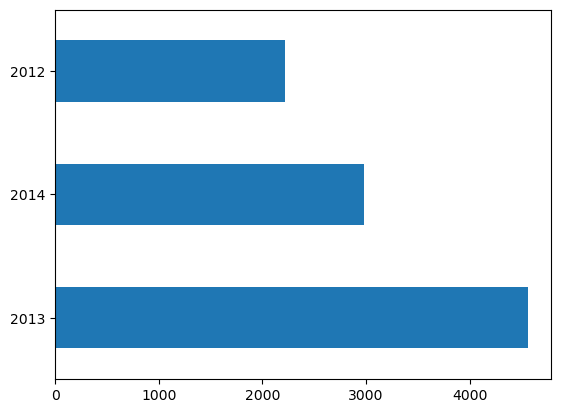

In [32]:
non_adopt['year'] = non_adopt['creation_time'].dt.year
non_adopt['year'].value_counts().plot(kind='barh')

from the figure above and relative to the number of users that are adopted it shows that in 2014 had the high % of users who are not adopted and 2012 had more adopted users relative to the total users that year
so top management has to look at some strategies that were implimented in 2012 or the market compitition

C:\Users\Consultant\AppData\Local\Temp\ipykernel_19744\804938202.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  non_adopt['month'] = non_adopt['creation_time'].dt.month


<Axes: >

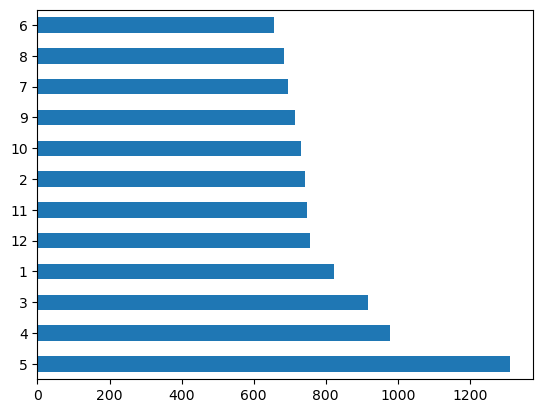

In [33]:
non_adopt['month'] = non_adopt['creation_time'].dt.month
non_adopt['month'].value_counts().plot(kind='barh')

from the figure it shows that clients in month may are not adopted while month 8,3, and 8 are good months were more adopted members and less non adopted members relative to the other months

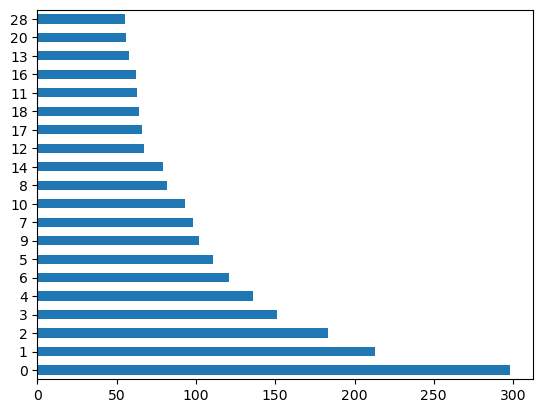

In [34]:
c2=non_adopt['org_id'].value_counts().head(20).plot(kind='barh')

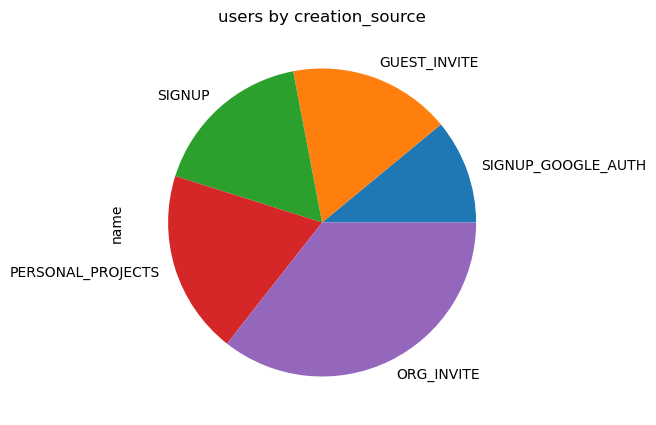

In [35]:
new_d=non_adopt.groupby('creation_source')['name'].size().sort_values(ascending=True).plot(kind='pie',figsize=(10, 5), title='users by creation_source')

from this bar chat we see that less users  who signed up using google and guest invite out of total were not adopted users compared to more users who were org invite and personal projects let the app
therefor management should invest more on google signups and guest invite

Feature engineering for modeling

In [36]:
data=non_adoptedu.apply(lambda x: 0 if pd.isnull(x['adopted_usersid']) else 1,axis=1)
non_adoptedu['Adopted_User']=data
non_adoptedu2=non_adoptedu.drop(['adopted_usersid','email','name'], axis=1)
non_adoptedu2['org_id'].value_counts()
non_adoptedu2['last_session_creation_time'] = pd.to_datetime(non_adoptedu2['last_session_creation_time'], unit='s')
non_adoptedu2['creation_time']=pd.to_datetime(non_adoptedu2['creation_time'])
non_adoptedu2['year'] = non_adoptedu2['creation_time'].dt.year
non_adoptedu2['month'] = non_adoptedu2['creation_time'].dt.month
non_adoptedu2['period_usage']=non_adoptedu2['last_session_creation_time']-non_adoptedu2['creation_time']
non_adoptedu2
non_adoptedu2['creation_source'].isnull().sum()
non_adoptedu2.head(50)

C:\Users\Consultant\anaconda3\Lib\site-packages\pandas\core\tools\datetimes.py:557: RuntimeWarning: invalid value encountered in cast
  arr, tz_parsed = tslib.array_with_unit_to_datetime(arg, unit, errors=errors)


,object_id,creation_time,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,Adopted_User,year,month,period_usage
0,1,2014-04-22 03:53:30,GUEST_INVITE,2014-04-22 03:53:30,1,0,11,10803.0,0,2014,4,0 days
1,2,2013-11-15 03:45:04,ORG_INVITE,2014-03-31 03:45:04,0,0,1,316.0,1,2013,11,136 days
2,3,2013-03-19 23:14:52,ORG_INVITE,2013-03-19 23:14:52,0,0,94,1525.0,0,2013,3,0 days
3,4,2013-05-21 08:09:28,GUEST_INVITE,2013-05-22 08:09:28,0,0,1,5151.0,0,2013,5,1 days
4,5,2013-01-17 10:14:20,GUEST_INVITE,2013-01-22 10:14:20,0,0,193,5240.0,0,2013,1,5 days
5,6,2013-12-17 03:37:06,GUEST_INVITE,2013-12-19 03:37:06,0,0,197,11241.0,0,2013,12,2 days
6,7,2012-12-16 13:24:32,SIGNUP,2012-12-20 13:24:32,0,1,37,NaN,0,2012,12,4 days
7,8,2013-07-31 05:34:02,PERSONAL_PROJECTS,NaT,1,1,74,NaN,0,2013,7,NaT
8,9,2013-11-05 04:04:24,PERSONAL_PROJECTS,NaT,0,0,302,NaN,0,2013,11,NaT
9,10,2013-01-16 22:08:03,ORG_INVITE,2014-06-03 22:08:03,1,1,318,4143.0,1,2013,1,503 days


In [37]:
non_adoptedu22=non_adoptedu2.apply(lambda x: str(x['period_usage']).split(' ')[0],axis=1)
non_adoptedu2['period_usage']=non_adoptedu22
non_adoptedu2=non_adoptedu2.drop(['last_session_creation_time'], axis=1)
non_adoptedu2['invited_by_user_id'].fillna(0, inplace=True)
non_adoptedu2.head(30)

,object_id,creation_time,creation_source,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,Adopted_User,year,month,period_usage
0,1,2014-04-22 03:53:30,GUEST_INVITE,1,0,11,10803.0,0,2014,4,0
1,2,2013-11-15 03:45:04,ORG_INVITE,0,0,1,316.0,1,2013,11,136
2,3,2013-03-19 23:14:52,ORG_INVITE,0,0,94,1525.0,0,2013,3,0
3,4,2013-05-21 08:09:28,GUEST_INVITE,0,0,1,5151.0,0,2013,5,1
4,5,2013-01-17 10:14:20,GUEST_INVITE,0,0,193,5240.0,0,2013,1,5
5,6,2013-12-17 03:37:06,GUEST_INVITE,0,0,197,11241.0,0,2013,12,2
6,7,2012-12-16 13:24:32,SIGNUP,0,1,37,0.0,0,2012,12,4
7,8,2013-07-31 05:34:02,PERSONAL_PROJECTS,1,1,74,0.0,0,2013,7,NaT
8,9,2013-11-05 04:04:24,PERSONAL_PROJECTS,0,0,302,0.0,0,2013,11,NaT
9,10,2013-01-16 22:08:03,ORG_INVITE,1,1,318,4143.0,1,2013,1,503


In [38]:
non_adoptedu2.creation_source.value_counts()

ORG_INVITE            4254
GUEST_INVITE          2163
PERSONAL_PROJECTS     2111
SIGNUP                2087
SIGNUP_GOOGLE_AUTH    1385
Name: creation_source, dtype: int64

In [39]:
one_hot_encoded = pd.get_dummies(non_adoptedu2.creation_source)
one_hot_encoded
dfencoded = pd.concat([non_adoptedu2, one_hot_encoded], axis=1)
dfencoded=dfencoded.drop(['object_id','creation_time','creation_source'],axis=1)
value_counts=dfencoded.invited_by_user_id.value_counts()
value_counts


0.0        5583
10741.0      13
2527.0       12
1525.0       11
2308.0       11
           ... 
2071.0        1
1390.0        1
5445.0        1
8526.0        1
5450.0        1
Name: invited_by_user_id, Length: 2565, dtype: int64

In [40]:
#grouping the invited by user_id in to categories based on their counts
category=dfencoded.invited_by_user_id


count_intervals = [(1, 4), (5, 9), (10, 13)]
integer_codes = [1, 2, 3]

# Create a mapping of categories to integer codes based on intervals
category_to_code = {}

for interval, code in zip(count_intervals, integer_codes):
    lower_bound, upper_bound = interval
    for category, count in value_counts.items():
        if lower_bound <= count <= upper_bound:
            category_to_code[category] = code
# Apply integer encoding based on the defined intervals
dfencoded['category_of_invited_user'] = dfencoded.invited_by_user_id.map(category_to_code)
dfencoded['category_of_invited_user'].fillna(0,inplace=True)
dfencoded['period_usage']=dfencoded['period_usage'].replace({'NaT':0})
v_counts=dfencoded.org_id.value_counts()
dfencoded


,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,Adopted_User,year,month,period_usage,GUEST_INVITE,ORG_INVITE,PERSONAL_PROJECTS,SIGNUP,SIGNUP_GOOGLE_AUTH,category_of_invited_user
0,1,0,11,10803.0,0,2014,4,0,1,0,0,0,0,1.0
1,0,0,1,316.0,1,2013,11,136,0,1,0,0,0,1.0
2,0,0,94,1525.0,0,2013,3,0,0,1,0,0,0,3.0
3,0,0,1,5151.0,0,2013,5,1,1,0,0,0,0,2.0
4,0,0,193,5240.0,0,2013,1,5,1,0,0,0,0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11995,0,0,89,8263.0,0,2013,9,0,0,1,0,0,0,2.0
11996,0,0,200,0.0,0,2013,1,5,0,0,0,0,1,0.0
11997,1,1,83,8074.0,0,2014,4,0,1,0,0,0,0,2.0
11998,0,0,6,0.0,0,2012,5,2,0,0,1,0,0,0.0


In [41]:
#grouping the org_id in to categories based on their counts
#lower_bound = 1
#upper_bound = 13
categories=dfencoded.org_id


count_intervals2 = [(1, 100), (101, 200), (201, 300),(301,400)]
integer_codes1 = [0,1, 2, 3]

# Create a mapping of categories to integer codes based on intervals
category_to_code1 = {}

for interval1, code1 in zip(count_intervals2, integer_codes1):
    lower_bound, upper_bound = interval1
    for categories, count in v_counts.items():
        if lower_bound <= count <= upper_bound:
            category_to_code1[categories] = code1
# Apply integer encoding based on the defined intervals
dfencoded['category_of_group_org'] = dfencoded.org_id.map(category_to_code1)
dfencoded

,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,Adopted_User,year,month,period_usage,GUEST_INVITE,ORG_INVITE,PERSONAL_PROJECTS,SIGNUP,SIGNUP_GOOGLE_AUTH,category_of_invited_user,category_of_group_org
0,1,0,11,10803.0,0,2014,4,0,1,0,0,0,0,1.0,0
1,0,0,1,316.0,1,2013,11,136,0,1,0,0,0,1.0,2
2,0,0,94,1525.0,0,2013,3,0,0,1,0,0,0,3.0,0
3,0,0,1,5151.0,0,2013,5,1,1,0,0,0,0,2.0,2
4,0,0,193,5240.0,0,2013,1,5,1,0,0,0,0,2.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11995,0,0,89,8263.0,0,2013,9,0,0,1,0,0,0,2.0,0
11996,0,0,200,0.0,0,2013,1,5,0,0,0,0,1,0.0,0
11997,1,1,83,8074.0,0,2014,4,0,1,0,0,0,0,2.0,0
11998,0,0,6,0.0,0,2012,5,2,0,0,1,0,0,0.0,1


Modeling
based on the problem we have to build a model which can predict if a new user will become an adopted user or not based on all the factors that we have gathered that influences this decision.
this model will help the business to improve aspects of its business.

In [42]:
X=dfencoded.drop(['Adopted_User','invited_by_user_id','org_id'],axis=1)
Y=dfencoded['Adopted_User']
X

,opted_in_to_mailing_list,enabled_for_marketing_drip,year,month,period_usage,GUEST_INVITE,ORG_INVITE,PERSONAL_PROJECTS,SIGNUP,SIGNUP_GOOGLE_AUTH,category_of_invited_user,category_of_group_org
0,1,0,2014,4,0,1,0,0,0,0,1.0,0
1,0,0,2013,11,136,0,1,0,0,0,1.0,2
2,0,0,2013,3,0,0,1,0,0,0,3.0,0
3,0,0,2013,5,1,1,0,0,0,0,2.0,2
4,0,0,2013,1,5,1,0,0,0,0,2.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
11995,0,0,2013,9,0,0,1,0,0,0,2.0,0
11996,0,0,2013,1,5,0,0,0,0,1,0.0,0
11997,1,1,2014,4,0,1,0,0,0,0,2.0,0
11998,0,0,2012,5,2,0,0,1,0,0,0.0,1


basicly this is a binary classification problem so we will test several binary classification models like logistic regression,DT,RF,SVM etc and see which one is best

In [47]:
#import usefull packages for modelling
#!pip install tensorflow
#!pip install keras
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.metrics import mean_absolute_error, accuracy_score, classification_report, confusion_matrix
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformer
from sklearn.pipeline import make_pipeline
from sklearn.ensemble import RandomForestClassifier
!pip install mlflow
import mlflow.sklearn
import numpy as np


  Obtaining dependency information for mlflow from https://files.pythonhosted.org/packages/48/6c/fbbdcfae990a13006da012f2af459f4c76dc9d07160782a108a524825e88/mlflow-2.7.1-py3-none-any.whl.metadata
  Using cached mlflow-2.7.1-py3-none-any.whl.metadata (12 kB)
  Obtaining dependency information for databricks-cli<1,>=0.8.7 from https://files.pythonhosted.org/packages/ae/a3/d56f8382c40899301f327d1c881278b09c9b8bc301c2c111633a0346d06e/databricks_cli-0.18.0-py2.py3-none-any.whl.metadata
  Using cached databricks_cli-0.18.0-py2.py3-none-any.whl.metadata (4.0 kB)
  Obtaining dependency information for gitpython<4,>=2.1.0 from https://files.pythonhosted.org/packages/8a/7e/20f7e45878b5aed34320fbeeae8f78acc806e7bd708d00b1c6e64b016f5b/GitPython-3.1.37-py3-none-any.whl.metadata
  Using cached GitPython-3.1.37-py3-none-any.whl.metadata (12 kB)
  Using cached sqlparse-0.4.4-py3-none-any.whl (41 kB)
  Obtaining dependency information for alembic!=1.10.0,<2 from https://files.pythonhosted.org/packages

In [48]:
# We will split data and apply oneHot encoder on all categories we generated to avoid dimensionality issues of the different classes
X_train,X_test,y_train,y_test=train_test_split(X,Y,test_size=0.2)
ohe=OneHotEncoder()
ohe.fit(X[['category_of_invited_user','category_of_group_org','year','month']])
column_trans=make_column_transformer((OneHotEncoder(categories=ohe.categories_),['category_of_invited_user','category_of_group_org','year','month']),remainder='passthrough')


In [49]:
with mlflow.start_run():
  lr=LogisticRegression()
  log_reg=make_pipeline(column_trans,lr)
  log_reg.fit(X_train,y_train)
  y_train_pred1 = log_reg.predict(X_train)
  y_pred=log_reg.predict(X_test)
  accuracyt= metrics.accuracy_score(y_train, y_train_pred1)
  accuracy= metrics.accuracy_score(y_test, y_pred)
  print(classification_report(y_test, y_pred))
  print('lr train accuracy is:',accuracyt)
  print('lr test accuracy is:',accuracy)
  #mlflow.log_params({'param1': value1, 'param2': value2})
  mlflow.log_metric('accuracy', accuracy)
  mlflow.sklearn.log_model(log_reg,"model")
  #mlflow.sklearn.save_model(log_reg,"logisticReg1")
  #mlflow.log_artifact("logisticR.png")



C:\Users\Consultant\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


              precision    recall  f1-score   support

           0       0.98      0.99      0.99      1937
           1       0.95      0.93      0.94       463

    accuracy                           0.98      2400
   macro avg       0.97      0.96      0.96      2400
weighted avg       0.98      0.98      0.98      2400

lr train accuracy is: 0.9798958333333333
lr test accuracy is: 0.9775


C:\Users\Consultant\anaconda3\Lib\site-packages\_distutils_hack\__init__.py:33: UserWarning: Setuptools is replacing distutils.
  warnings.warn("Setuptools is replacing distutils.")


In [50]:
with mlflow.start_run():
  rf_classifier = RandomForestClassifier(class_weight='balanced', random_state=42)
  rf=make_pipeline(column_trans,rf_classifier )
  rf.fit(X_train,y_train)
  y_train_pred = rf.predict(X_train)
  y_pred=rf.predict(X_test)
  accuracytrain= metrics.accuracy_score(y_train, y_train_pred)
  accuracy2= metrics.accuracy_score(y_test, y_pred)
  print('rf train accuracy is:',accuracytrain)
  print('rf test accuracy is:',accuracy2)
  #mlflow.log_params({'param1': value1, 'param2': value2})
  mlflow.log_metric('accuracy', accuracy2)
  mlflow.sklearn.log_model(rf,"model")

rf train accuracy is: 0.9988541666666667
rf test accuracy is: 0.9766666666666667


but the data is imbalance so we will try methods that can handle imbalance data like RF which didnot do much
we will use over sampling technichs since in this case the non adopted users are 4.3 times the adopted users in the data set

In [51]:
dfad1=dfencoded[dfencoded['Adopted_User']==1]
duplicated_df = pd.concat([dfad1] * 3, ignore_index=True)





In [81]:
oversampled_data=pd.concat([dfencoded,duplicated_df],ignore_index=True)
oversampled_data.Adopted_User.value_counts()
oversampled_data1=oversampled_data.drop(['invited_by_user_id','org_id'],axis=1)
oversampled_data1.to_csv('cleaned_data.csv')

from the value count the two categories now have similar sample size and we expect the model not to under fit

In [63]:
X1=oversampled_data.drop(['Adopted_User','invited_by_user_id','org_id'],axis=1)
Y1=oversampled_data['Adopted_User']
X_train1,X_test1,y_train1,y_test1=train_test_split(X1,Y1,test_size=0.2)
ohe2=OneHotEncoder()
ohe2.fit(X1[['category_of_invited_user','category_of_group_org','year','month']])
column_trans2=make_column_transformer((OneHotEncoder(categories=ohe2.categories_),['category_of_invited_user','category_of_group_org','year','month']),remainder='passthrough')
X1.to_csv('Train data.csv')
Y1.to_csv('predict_data.csv')

In [55]:
with mlflow.start_run():
  lr2=LogisticRegression(random_state=100)
  log_reg1=make_pipeline(column_trans2,lr2)
  log_reg1.fit(X_train1,y_train1)
  y_train_pred2 = log_reg1.predict(X_train1)
  y_pred1=log_reg1.predict(X_test1)
  accuracyt1= metrics.accuracy_score(y_train1, y_train_pred2)
  accuracyt2= metrics.accuracy_score(y_test1, y_pred1)
  print(classification_report(y_test1, y_pred1))
  print('lr train accuracy is:',accuracyt1)
  print('lr test accuracy is:',accuracyt2)
  #mlflow.log_params({'param1': value1, 'param2': value2})
  mlflow.log_metric('accuracy', accuracyt2)
  mlflow.sklearn.log_model(log_reg1,"best_model")
  #mlflow.sklearn.save_model(log_reg1,"best_model")
  #mlflow.log_artifact("logisticR.png")
  y_pred3=log_reg1.predict(X_test1.head(5))
  print(y_pred3)

C:\Users\Consultant\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


              precision    recall  f1-score   support

           0       0.98      0.98      0.98      1993
           1       0.97      0.98      0.98      1756

    accuracy                           0.98      3749
   macro avg       0.98      0.98      0.98      3749
weighted avg       0.98      0.98      0.98      3749

lr train accuracy is: 0.980326775591864
lr test accuracy is: 0.9773272872766071
[1 1 0 0 0]


In [57]:
loaded_model = mlflow.sklearn.load_model("best_model")
pred1=loaded_model.predict(X_test1.head(5))
pred1
#X_test.head(3)


array([1, 1, 0, 0, 0], dtype=int64)

In [59]:
mlflow.search_runs()

,run_id,experiment_id,status,artifact_uri,start_time,end_time,metrics.accuracy,tags.mlflow.log-model.history,tags.mlflow.user,tags.mlflow.runName,tags.mlflow.source.type,tags.mlflow.source.name
0,c69a45b8d7c74d16bf189ae797e84ee5,0,FINISHED,file:///C:/Users/Consultant/Downloads/Project_...,2023-10-13 23:20:01.243000+00:00,2023-10-13 23:20:18.880000+00:00,0.977327,"[{""run_id"": ""c69a45b8d7c74d16bf189ae797e84ee5""...",Consultant,sassy-hawk-26,LOCAL,C:\Users\Consultant\anaconda3\Lib\site-package...
1,c67ce35ade4e4fe490dc96632a9bc0d5,0,FINISHED,file:///C:/Users/Consultant/Downloads/Project_...,2023-10-13 23:19:13.981000+00:00,2023-10-13 23:19:24.215000+00:00,0.976667,"[{""run_id"": ""c67ce35ade4e4fe490dc96632a9bc0d5""...",Consultant,learned-ox-707,LOCAL,C:\Users\Consultant\anaconda3\Lib\site-package...
2,36b18f63f3b7447984e4a9310dbe961c,0,FINISHED,file:///C:/Users/Consultant/Downloads/Project_...,2023-10-13 23:19:02.422000+00:00,2023-10-13 23:19:13.925000+00:00,0.977500,"[{""run_id"": ""36b18f63f3b7447984e4a9310dbe961c""...",Consultant,orderly-worm-141,LOCAL,C:\Users\Consultant\anaconda3\Lib\site-package...


In [64]:
import subprocess

# Command to start MLflow UI
mlflow_ui_command = "mlflow ui --port 5000"

# Run the command in the background
subprocess.Popen(mlflow_ui_command, shell=True)

<Popen: returncode: None args: 'mlflow ui --port 5000'>

In [112]:
import mlflow
logged_model = 'runs:/c69a45b8d7c74d16bf189ae797e84ee5/best_model'

# Load model as a PyFuncModel.
loaded_model = mlflow.pyfunc.load_model(logged_model)

# Predict on a Pandas DataFrame.
import pandas as pd
loaded_model.predict(pd.DataFrame(oversampled_data1))

array([0, 1, 0, ..., 1, 1, 1], dtype=int64)

In [ ]:
#model deployment into production

In [113]:
def perform_inference(input_data):
    loaded_model = mlflow.sklearn.load_model('runs:/c69a45b8d7c74d16bf189ae797e84ee5/best_model')
    predictions = loaded_model.predict(input_data)
    return predictions

# Perform inference
predictions = perform_inference(oversampled_data1.head(45))


In [108]:
predictions

array([0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       0], dtype=int64)

In [ ]:
#monitoring the model if there are any model drifts or alerts

In [111]:
def perform_inference(oversampled_data1):
    loaded_model = mlflow.sklearn.load_model("runs:/c69a45b8d7c74d16bf189ae797e84ee5/best_model")
    predictions = loaded_model.predict(oversampled_data1)
    mlflow.log_params({"input_data": oversampled_data1, "predictions": predictions})
    return predictions